# Proyecto 4 - Análisis de defunciones en el Estado de México 2022

__Key:__
💡 Reflexiones/ conclusiones
📙 Conceptos teoricos
✅ Tareas
📌 Algoritmos

## 🌟 Introducción <a name="introduccion"></a>
<a href="#temario"><small>Volver al temario</small></a>

En la era contemporánea, la tecnología ha permitido la recopilación y análisis de grandes volúmenes de datos, lo que ha impulsado el desarrollo de diversas disciplinas, entre ellas el Machine Learning. Esta rama de la inteligencia artificial se ha convertido en una herramienta poderosa para extraer información valiosa a partir de conjuntos de datos complejos, permitiendo la identificación de patrones, predicciones y toma de decisiones automatizadas.

En este contexto, el presente proyecto, utilizamos técnicas de Machine Learning para analizar una base de datos de __defunciones ocurridas en el Estado de México en 2022__. Esta base de datos incluye información sobre variables como sexo, edad, estado conyugal, ocupación y causa de la defunción. Nuestro objetivo es __identificar patrones y correlaciones que ayuden a comprender mejor las causas de las defunciones y a desarrollar modelos predictivos para prevenir situaciones de riesgo en el futuro__. Este estudio busca contribuir a la promoción de la salud y el bienestar de la población del Estado de México.

## 📄 Temario <a name="temario"></a>

1. [Introducción](#introduccion)

2. [Librerías](#librerias)

3. [Preparación de datos](#importar-datasets) 
   - [📊 Importar datasets](#importar-datasets) 
   - [🛠️ Limpieza de datos](#limpieza-de-datos) 
   - [🔢 Codificación de variables](#codificacion-de-variables)
<br><br>
4. [Objetivos del proyecto](#objetivos)
   - [🎯 Objetivo 1:](#objetivo-1) Construir un algoritmo de Machine Learning No-supervisado que resuelva un problema específico.
    - [🎯 Objetivo 2:](#objetivo-2) Construir un algoritmo de Machine Learning de regresión lineal o polinomial.
    - [🎯 Objetivo 3:](#objetivo-3) Construir un algoritmo de Machine Learning de árboles de decisión para clasificación.
    - [🎯 Objetivo 4:](#objetivo-5) Construir varios algoritmos de clasificación basados en Machine Learning, y mostrar cuál es el mejor con base en evidencia sólida.

## 📦 Librerias <a name="librerias"></a>
<a href="#temario"><small>Volver al temario</small></a>

In [701]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder


#import MLUtilities.py as utils

## 📊 Importar datasets <a name="importar-datasets"></a>
<a href="#temario"><small>Volver al temario</small></a>

In [702]:
df = 'BASE_2022_DEF.csv'
df = pd.read_csv(df)
df.head()

,SEXOD,EDAD,ESTADOCONYUGALD,ESCOLARIDADD,CLAVEOCUPACIONHABITUALD,TRABAJAACTUALMENTED,AFILIACIOND,SITIODEFUNCIOND,MUNICIPIODEFUNCIOND,LOCALIDADDEFUNCIOND,CODIGOPOSTALDEFUNCION,JURISDICCIONDEFUNCIOND,FECHADEFUNCION,HORADEFUNCION,MUERTEACCIDENTALVIOLENTAD,CIECAUSABASICA,CIECAUSABASICAD
0,MUJER,66,CASADO(A),SECUNDARIA COMPLETA,"NO REMUNERADO, AMA DE CASA",NO,IMSS,IMSS,ECATEPEC DE MORELOS,ECATEPEC DE MORELOS,55400,ECATEPEC,1/9/22,15:15,NO,J189,"NEUMONÍA, NO ESPECIFICADA"
1,HOMBRE,72,UNION LIBRE,SECUNDARIA COMPLETA,"NO OCUPADO, JUBILADO O PENSIONADO",NO,IMSS,HOGAR,LA PAZ,NO ESPECIFICADO,56524,NEZAHUALCÓYOTL,1/10/22,14:30,NO,E117,"DIABETES MELLITUS TIPO 2, CON COMPLICACIONES M..."
2,MUJER,89,VIUDO(A),PRIMARIA INCOMPLETA,"NO REMUNERADO, AMA DE CASA",NO,IMSS,HOGAR,ATIZAPÁN DE ZARAGOZA,CIUDAD LOPEZ MATEOS,52940,ATIZAPÁN DE ZARAGOZA,8/20/22,9:15,NO,E116,"DIABETES MELLITUS TIPO 2, CON OTRAS COMPLICACI..."
3,HOMBRE,53,CASADO(A),PRIMARIA INCOMPLETA,TRABAJADORES EN ACTIVIDADES AGRÍCOLAS Y GANADERAS,SI,SE IGNORA,UNIDAD MEDICA PRIVADA,TOLUCA,TOLUCA DE LERDO,50040,TOLUCA,2/9/22,19:15,NO,I609,"HEMORRAGIA SUBARACNOIDEA, NO ESPECIFICADA"
4,HOMBRE,82,CASADO(A),PRIMARIA INCOMPLETA,COMERCIANTES EN ESTABLECIMIENTOS,SI,NINGUNA,HOGAR,IXTLAHUACA,BARRIO SAN JOAQUIN LA CABECERA,50740,IXTLAHUACA,2/13/22,6:30,NO,I219,"INFARTO AGUDO DEL MIOCARDIO, SIN OTRA ESPECIFI..."


In [703]:
numero_de_filas = len(df)
print(numero_de_filas)

90117


In [704]:
df.isnull().sum()

SEXOD                        0
EDAD                         0
ESTADOCONYUGALD              0
ESCOLARIDADD                 0
CLAVEOCUPACIONHABITUALD      0
TRABAJAACTUALMENTED          0
AFILIACIOND                  0
SITIODEFUNCIOND              0
MUNICIPIODEFUNCIOND          0
LOCALIDADDEFUNCIOND          0
CODIGOPOSTALDEFUNCION        0
JURISDICCIONDEFUNCIOND       0
FECHADEFUNCION               0
HORADEFUNCION                0
MUERTEACCIDENTALVIOLENTAD    0
CIECAUSABASICA               0
CIECAUSABASICAD              0
dtype: int64

In [705]:
df.isna().sum()

SEXOD                        0
EDAD                         0
ESTADOCONYUGALD              0
ESCOLARIDADD                 0
CLAVEOCUPACIONHABITUALD      0
TRABAJAACTUALMENTED          0
AFILIACIOND                  0
SITIODEFUNCIOND              0
MUNICIPIODEFUNCIOND          0
LOCALIDADDEFUNCIOND          0
CODIGOPOSTALDEFUNCION        0
JURISDICCIONDEFUNCIOND       0
FECHADEFUNCION               0
HORADEFUNCION                0
MUERTEACCIDENTALVIOLENTAD    0
CIECAUSABASICA               0
CIECAUSABASICAD              0
dtype: int64

## 🛠️ Limpieza de datos <a name="limpieza-de-datos"></a>
<a href="#temario"><small>Volver al temario</small></a>

In [706]:
df.columns = df.columns.str.lower()
df.columns

Index(['sexod', 'edad', 'estadoconyugald', 'escolaridadd',
       'claveocupacionhabituald', 'trabajaactualmented', 'afiliaciond',
       'sitiodefunciond', 'municipiodefunciond', 'localidaddefunciond',
       'codigopostaldefuncion', 'jurisdicciondefunciond', 'fechadefuncion',
       'horadefuncion', 'muerteaccidentalviolentad', 'ciecausabasica',
       'ciecausabasicad'],
      dtype='object')

In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90117 entries, 0 to 90116
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   sexod                      90117 non-null  object
 1   edad                       90117 non-null  int64 
 2   estadoconyugald            90117 non-null  object
 3   escolaridadd               90117 non-null  object
 4   claveocupacionhabituald    90117 non-null  object
 5   trabajaactualmented        90117 non-null  object
 6   afiliaciond                90117 non-null  object
 7   sitiodefunciond            90117 non-null  object
 8   municipiodefunciond        90117 non-null  object
 9   localidaddefunciond        90117 non-null  object
 10  codigopostaldefuncion      90117 non-null  int64 
 11  jurisdicciondefunciond     90117 non-null  object
 12  fechadefuncion             90117 non-null  object
 13  horadefuncion              90117 non-null  object
 14  muerte

✅ Revisamos las columnas y convertimos a los tipos de dato más convenientes.

In [708]:
columnas_a_convertir = ['sexod', 'estadoconyugald', 'escolaridadd', 'trabajaactualmented', 'afiliaciond', 'muerteaccidentalviolentad']
df[columnas_a_convertir] = df[columnas_a_convertir].astype('category')

In [709]:
df['codigopostaldefuncion'] = df['codigopostaldefuncion'].astype(str)

In [710]:
df['fechadefuncion'] = pd.to_datetime(df['fechadefuncion'], format='%m/%d/%y', errors='coerce')

In [711]:
df['horadefuncion'] = pd.to_datetime(df['horadefuncion'], format='%H:%M', errors='coerce').dt.time

In [712]:
df['Timestamp'] = pd.to_datetime(df['fechadefuncion'].astype(str) + ' ' + df['horadefuncion'].astype(str), errors='coerce')

In [713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90117 entries, 0 to 90116
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sexod                      90117 non-null  category      
 1   edad                       90117 non-null  int64         
 2   estadoconyugald            90117 non-null  category      
 3   escolaridadd               90117 non-null  category      
 4   claveocupacionhabituald    90117 non-null  object        
 5   trabajaactualmented        90117 non-null  category      
 6   afiliaciond                90117 non-null  category      
 7   sitiodefunciond            90117 non-null  object        
 8   municipiodefunciond        90117 non-null  object        
 9   localidaddefunciond        90117 non-null  object        
 10  codigopostaldefuncion      90117 non-null  object        
 11  jurisdicciondefunciond     90117 non-null  object        
 12  fech

In [714]:
df.sample(20)

,sexod,edad,estadoconyugald,escolaridadd,claveocupacionhabituald,trabajaactualmented,afiliaciond,sitiodefunciond,municipiodefunciond,localidaddefunciond,codigopostaldefuncion,jurisdicciondefunciond,fechadefuncion,horadefuncion,muerteaccidentalviolentad,ciecausabasica,ciecausabasicad,Timestamp
50866,HOMBRE,43,CASADO(A),PRIMARIA COMPLETA,OCUPACIONES NO ESPECIFICADAS,SI,NINGUNA,SECRETARIA DE SALUD,NEZAHUALCÓYOTL,CIUDAD NEZAHUALCOYOTL,57820,NEZAHUALCÓYOTL,2022-07-21,NaT,SI,Y349,"EVENTO NO ESPECIFICADO, DE INTENCIÓN NO DETERM...",NaT
5658,HOMBRE,65,CASADO(A),PRIMARIA INCOMPLETA,TRABAJADORES EN LA ELABORACIÓN Y PROCESAMIENTO...,SI,NINGUNA,OTRO LUGAR,CHIMALHUACÁN,CHIMALHUACAN,99999,TEXCOCO,2022-01-13,16:45:00,NO,E110,"DIABETES MELLITUS TIPO 2, CON COMA",2022-01-13 16:45:00
26329,HOMBRE,1,NO APLICA,NO APLICA,NO APLICA,NO APLICA,NINGUNA,OTRA UNIDAD PÚBLICA,TOLUCA,TOLUCA DE LERDO,50170,TOLUCA,2022-03-18,03:00:00,NO,N390,"INFECCIÓN DE VÍAS URINARIAS, SITIO NO ESPECIFI...",2022-03-18 03:00:00
74430,HOMBRE,65,CASADO(A),PRIMARIA INCOMPLETA,OCUPACIONES NO ESPECIFICADAS,NO,IMSS,IMSS,NAUCALPAN DE JUÁREZ,NAUCALPAN DE JUAREZ,53000,NAUCALPAN,2022-07-26,12:55:00,NO,J22X,INFECCIÓN AGUDA NO ESPECIFICADA DE LAS VÍAS RE...,2022-07-26 12:55:00
65645,MUJER,71,SOLTERO(A),NINGUNA,"NO OCUPADO, JUBILADO O PENSIONADO",NO,IMSS,OTRO LUGAR,NAUCALPAN DE JUÁREZ,NAUCALPAN DE JUAREZ,53000,NAUCALPAN,2022-03-20,14:10:00,NO,U071,"COVID-19, VIRUS IDENTIFICADO",2022-03-20 14:10:00
46837,MUJER,74,VIUDO(A),PRIMARIA COMPLETA,"NO REMUNERADO, AMA DE CASA",NO,NO ESPECIFICADO,HOGAR,CHIMALHUACÁN,CHIMALHUACAN,56350,TEXCOCO,2022-07-16,18:00:00,NO,E117,"DIABETES MELLITUS TIPO 2, CON COMPLICACIONES M...",2022-07-16 18:00:00
15460,MUJER,81,UNION LIBRE,NINGUNA,"NO REMUNERADO, AMA DE CASA",NO,SEGURO POPULAR / INSABI,HOGAR,ATIZAPÁN DE ZARAGOZA,NO ESPECIFICADO,52928,ATIZAPÁN DE ZARAGOZA,2022-03-01,16:40:00,NO,M069,"ARTRITIS REUMATOIDE, NO ESPECIFICADA",2022-03-01 16:40:00
38269,HOMBRE,91,VIUDO(A),NINGUNA,"NO OCUPADO, JUBILADO O PENSIONADO",NO,IMSS,HOGAR,TECÁMAC,TECAMAC DE FELIPE VILLANUEVA,55765,ZUMPANGO,2022-06-09,10:45:00,NO,I219,"INFARTO AGUDO DEL MIOCARDIO, SIN OTRA ESPECIFI...",2022-06-09 10:45:00
88199,MUJER,47,DIVORCIADO(A),SECUNDARIA COMPLETA,COMERCIANTES EN ESTABLECIMIENTOS,SI,NINGUNA,HOGAR,LA PAZ,LOS REYES ACAQUILPAN,56400,NEZAHUALCÓYOTL,2022-12-26,07:15:00,NO,U072,"COVID-19, VIRUS NO IDENTIFICADO",2022-12-26 07:15:00
52025,HOMBRE,76,VIUDO(A),NINGUNA,TRABAJADORES EN ACTIVIDADES AGRÍCOLAS Y GANADERAS,NO,NINGUNA,HOGAR,SAN JOSÉ DEL RINCÓN,LOS LOBOS SEGUNDA SECCION,50670,IXTLAHUACA,2022-08-03,21:00:00,NO,K746,OTRAS CIRROSIS DEL HÍGADO Y LAS NO ESPECIFICADAS,2022-08-03 21:00:00


In [715]:
df.isnull().sum()

sexod                           0
edad                            0
estadoconyugald                 0
escolaridadd                    0
claveocupacionhabituald         0
trabajaactualmented             0
afiliaciond                     0
sitiodefunciond                 0
municipiodefunciond             0
localidaddefunciond             0
codigopostaldefuncion           0
jurisdicciondefunciond          0
fechadefuncion                  0
horadefuncion                1655
muerteaccidentalviolentad       0
ciecausabasica                  0
ciecausabasicad                 0
Timestamp                    1655
dtype: int64

In [716]:
df.isna().sum()

sexod                           0
edad                            0
estadoconyugald                 0
escolaridadd                    0
claveocupacionhabituald         0
trabajaactualmented             0
afiliaciond                     0
sitiodefunciond                 0
municipiodefunciond             0
localidaddefunciond             0
codigopostaldefuncion           0
jurisdicciondefunciond          0
fechadefuncion                  0
horadefuncion                1655
muerteaccidentalviolentad       0
ciecausabasica                  0
ciecausabasicad                 0
Timestamp                    1655
dtype: int64

In [717]:
descripcion_edad = df['edad'].describe()
print(descripcion_edad)
#Nota: en el registro cuando no se conoce la edad, se coloca 999

count    90117.000000
mean        66.746696
std         49.494207
min          1.000000
25%         53.000000
50%         68.000000
75%         81.000000
max        999.000000
Name: edad, dtype: float64


In [718]:
df.dtypes

sexod                              category
edad                                  int64
estadoconyugald                    category
escolaridadd                       category
claveocupacionhabituald              object
trabajaactualmented                category
afiliaciond                        category
sitiodefunciond                      object
municipiodefunciond                  object
localidaddefunciond                  object
codigopostaldefuncion                object
jurisdicciondefunciond               object
fechadefuncion               datetime64[ns]
horadefuncion                        object
muerteaccidentalviolentad          category
ciecausabasica                       object
ciecausabasicad                      object
Timestamp                    datetime64[ns]
dtype: object

## 🔢 Codificación de variables <a name="codificacion-de-variables"></a>
<a href="#temario"><small>Volver al temario</small></a>

### 📌 Codificación de X

✅ Originalmente utilizamos __LabelEncoder()__ para transformar las variables categóricas. El inconveniente es que este transformador asigna números a las categorías y se puede introducir un orden implícito o una relación lineal que no existe en realidad en los datos.

Por ejemplo, teníamos:

Valores para la columna 'sexod_encoded':
0: MUJER
1: HOMBRE
2: NO ESPECIFICADO
3: SE IGNORA

En esta categoría algunos algoritmos podrían interpretar que "3: SE IGNORA" es más grande que "1: HOMBRE", lo cual no tiene sentido en este contexto.

📙 Por esto optamos por utilizar __OneHotEncoder()__, una técnica de codificación que crea columnas binarias separadas para cada categoría. En lugar de asignar un único número a cada categoría, OneHotEncoder() crea una columna binaria para cada categoría, donde un valor de 1 indica la presencia de esa categoría y un valor de 0 indica su ausencia.

In [719]:
# Definimos las características categóricas
categorical_features = ['sexod', 'estadoconyugald', 'escolaridadd', 'trabajaactualmented', 'afiliaciond', 'muerteaccidentalviolentad']
X_categorical = df[categorical_features]

# Creamos un codificador OneHotEncoder
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(X_categorical)
X_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_features))
X = X_encoded_df

In [720]:
X.sample(10)

,sexod_HOMBRE,sexod_MUJER,sexod_NO ESPECIFICADO,sexod_SE IGNORA,estadoconyugald_CASADO(A),estadoconyugald_DIVORCIADO(A),estadoconyugald_NO APLICA,estadoconyugald_NO ESPECIFICADO,estadoconyugald_SE IGNORA,estadoconyugald_SEPARADO(A),...,afiliaciond_NINGUNA,afiliaciond_NO ESPECIFICADO,afiliaciond_OTRA,afiliaciond_PEMEX,afiliaciond_SE IGNORA,afiliaciond_SEDENA,afiliaciond_SEGURO POPULAR / INSABI,afiliaciond_SEMAR,muerteaccidentalviolentad_NO,muerteaccidentalviolentad_SI
38008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
84881,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2383,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
78587,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54187,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39818,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
81491,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67701,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78464,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51759,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 📌 Codificación de y

In [721]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['ciecausabasica'])
y = y_encoded

# 🗂️ Desarrollo de objetivos del proyecto <a name="objetivos"></a>
<a href="#temario"><small>Volver al temario</small></a>

## 🎯 Objetivo 1: Construir un algoritmo de Machine Learning No-supervisado que resuelva un problema específico. <a name="objetivo-1"></a>
<a href="#temario"><small>Volver al temario</small></a>

### 📌 Algoritmo de K-Means

✅ Para este objetivo utilizamos el algoritmo de K-Means para agrupar los datos en un número (N) de clusters (n_clusters).

📙 K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática. [Fuente: Universidad de Oviedo](https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html)

Este código podría ser útil para identificar patrones o grupos de defunciones similares en función de sus características.

In [722]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
inercia = kmeans.inertia_
print(f"Número de clusters: {n_clusters}, Inercia: {inercia}")

Número de clusters: 8, Inercia: 179544.9909667223


📙 La inercia es una medida de cuánto se dispersan los puntos dentro de los clústeres. Cuanto menor sea la inercia, más compactos y separados estarán los clusters.

__Resultados:__
* Número de clusters: 2, Inercia: 251157.53805301338
* Número de clusters: 3, Inercia: 228195.83512259147
* Número de clusters: 4, Inercia: 213580.97196838632
* Número de clusters: 5, Inercia: 200927.24054752375
* Número de clusters: 6, Inercia: 190707.0280792048
* Número de clusters: 7, Inercia: 182565.22094338256
* Número de clusters: 8, Inercia: 174958.5211468439
    
💡 __Reflexión:__
Parece que la inercia disminuye a medida que aumenta el número de clusters, para definir mejor el número de clusters usaremos el médoto del codo.

📙 __Método del codo (Elbow method):__
El objetivo del método del codo es encontrar el punto de inflexión en la curva, o el "codo". Después de esto, los clusters adicionales no minimizan la varianza dentro de los clusters de forma suficientemente significativa como para justificar agrupaciones adicionales en el conjunto de datos.
[Fuente: Keyrus](https://keyrus.com/sp/es/insights/clustering-la-formula-secreta-para-llegar-mejor-a-tus-clientes)

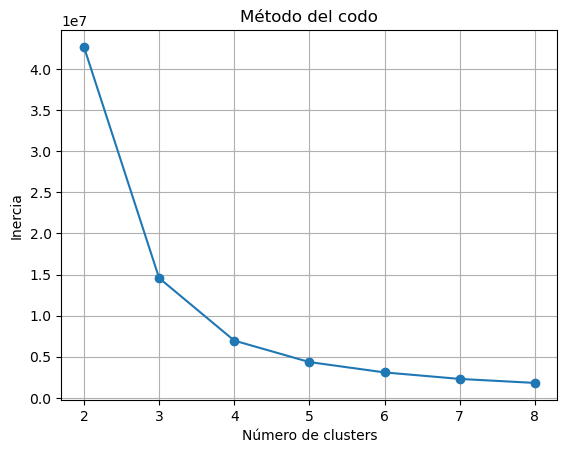

In [723]:
num_clusters = [2, 3, 4, 5, 6, 7, 8]
inertia_values = [42706409.37360321, 14579194.29196475, 6965500.9222211875, 4350563.898679208, 3093067.821319924, 2300612.709661798, 1813798.9055740992]

plt.plot(num_clusters, inertia_values, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.grid(True)
plt.show()

💡 En este caso, el codo se sitúa en torno a 4, por lo que podemos optar por cuatro clústeres .

In [724]:
K = 4
modelo_kmeans = KMeans(n_clusters=K, n_init=10).fit(X)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[9.99968672e-01 0.00000000e+00 0.00000000e+00 3.13283208e-05
  4.69768170e-01 2.21491228e-02 7.51879699e-04 1.25000000e-02
  1.96115288e-02 2.26190476e-02 1.52349624e-01 8.03884712e-02
  2.19862155e-01 6.97368421e-02 2.61278195e-02 6.74185464e-02
  1.79197995e-02 1.35933584e-01 0.00000000e+00 2.66290727e-03
  5.76441103e-03 2.19298246e-04 1.09649123e-03 1.25313283e-04
  2.61058897e-01 2.29041353e-01 8.67794486e-03 1.43546366e-01
  3.06704261e-02 9.72713033e-01 8.77192982e-04 1.45363409e-02
  1.18734336e-02 0.00000000e+00 4.02161654e-01 2.09899749e-03
  3.44611529e-04 5.52318296e-02 4.21334586e-01 2.09273183e-02
  4.07581454e-02 2.03634085e-03 3.87531328e-02 4.22932331e-03
  1.16541353e-02 4.69924812e-04 9.46710526e-01 5.32894737e-02]
 [9.52378373e-01 4.39917651e-02 2.16708202e-04 3.41315419e-03
  3.46787301e-01 2.68718171e-02 8.11572218e-02 1.42485643e-02
  4.43168274e-02 2.47047351e-02 2.25376531e-01 1.88048543e-01
  4.84884603e-02 1.22602666e-01 4.42084733e-02 8.12113989e-02
  2.232

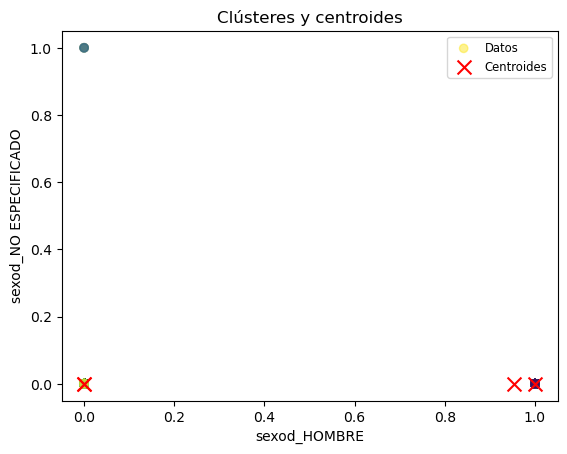

In [725]:
# Hicimos una visualización
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=modelo_kmeans.labels_, cmap='viridis', alpha=0.5, label='Datos')
plt.scatter(centroides[:, 0], centroides[:, 2], c='red', marker='x', s=100, label='Centroides')

plt.xlabel(X.columns[0]) 
plt.ylabel(X.columns[2])
plt.title('Clústeres y centroides')

plt.legend(loc='upper right', fontsize='small')
plt.show()

### 📌 Moda

✅ Para este ejercicio, nos pareció conveniente obtener la moda de las variables.

In [726]:
X_encoded_df.sample(10)

,sexod_HOMBRE,sexod_MUJER,sexod_NO ESPECIFICADO,sexod_SE IGNORA,estadoconyugald_CASADO(A),estadoconyugald_DIVORCIADO(A),estadoconyugald_NO APLICA,estadoconyugald_NO ESPECIFICADO,estadoconyugald_SE IGNORA,estadoconyugald_SEPARADO(A),...,afiliaciond_NINGUNA,afiliaciond_NO ESPECIFICADO,afiliaciond_OTRA,afiliaciond_PEMEX,afiliaciond_SE IGNORA,afiliaciond_SEDENA,afiliaciond_SEGURO POPULAR / INSABI,afiliaciond_SEMAR,muerteaccidentalviolentad_NO,muerteaccidentalviolentad_SI
26446,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38958,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54345,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
81773,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34036,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
89554,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59873,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9734,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
73406,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [727]:
modas_agrupadas = {}

for columna in X_encoded_df.columns:
    variable = columna.split('_')[0]
    
    moda = obtenerModa(X_encoded_df[columna])
    
    if variable not in modas_agrupadas:
        modas_agrupadas[variable] = {}
    modas_agrupadas[variable][columna] = moda

for variable, modalidades in modas_agrupadas.items():
    print(f"Modas de la variable '{variable}':")
    for columna, moda in modalidades.items():
        print(f"   - {columna}: {moda}")

Modas de la variable 'sexod':
   - sexod_HOMBRE: 1.0
   - sexod_MUJER: 0.0
   - sexod_NO ESPECIFICADO: 0.0
   - sexod_SE IGNORA: 0.0
Modas de la variable 'estadoconyugald':
   - estadoconyugald_CASADO(A): 0.0
   - estadoconyugald_DIVORCIADO(A): 0.0
   - estadoconyugald_NO APLICA: 0.0
   - estadoconyugald_NO ESPECIFICADO: 0.0
   - estadoconyugald_SE IGNORA: 0.0
   - estadoconyugald_SEPARADO(A): 0.0
   - estadoconyugald_SOLTERO(A): 0.0
   - estadoconyugald_UNION LIBRE: 0.0
   - estadoconyugald_VIUDO(A): 0.0
Modas de la variable 'escolaridadd':
   - escolaridadd_BACHILLERATO O PREPARATORIA COMPLETA: 0.0
   - escolaridadd_BACHILLERATO O PREPARATORIA INCOMPLETA: 0.0
   - escolaridadd_LICENCIATURA O PROFESIONAL COMPLETO: 0.0
   - escolaridadd_LICENCIATURA O PROFESIONAL INCOMPLETO: 0.0
   - escolaridadd_NINGUNA: 0.0
   - escolaridadd_NO APLICA: 0.0
   - escolaridadd_NO ESPECIFICADO: 0.0
   - escolaridadd_POSGRADO COMPLETO: 0.0
   - escolaridadd_POSGRADO INCOMPLETO: 0.0
   - escolaridadd_PREES

💡Los resultados muestran que la mayoría de las personas fallecidas en la base de datos son hombres, y muchos de ellos no estaban trabajando en el momento de su fallecimiento. Aún no parece haber una relación clara entre el estado civil, el nivel educativo, la afiliación a servicios de salud, o si la muerte fue accidental o violenta, y las defunciones registradas. Más adelante buscaremos analizar los factores podrían influir en las muertes para entender mejor estos patrones.

## 🎯 Objetivo 2: Construir un algoritmo de Machine Learning de regresión lineal o polinomial. <a name="objetivo-2"></a>
<a href="#temario"><small>Volver al temario</small></a>

### 📍 Modelo de regresión lineal

💡 Para este ejercicio inicialmente decidimos utilizar el 20% de los datos como conjunto de prueba para nuestro proyecto porque nuestro dataset era muy grande (90,117 filas) y consideramos que teníamos datos suficientes para evaluar el rendimiento del modelo, sin comprometer demasiado el tamaño del conjunto de entrenamiento.

In [728]:
print(df.shape[0])

90117


Con esto tendríamos 72,093 muestras en el conjunto de entrenamiento y 18,024 muestras en el conjunto de pruebas.

In [729]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(63081, 48)
(27036, 48)
(63081,)
(27036,)


In [730]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [731]:
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =113294.95810325566
Pruebas: MSE =111821.9393679655


📙 El MSE toma las diferencias entre cada predicción y su valor real, las eleva al cuadrado para eliminar el signo y luego calcula el promedio de estas diferencias cuadráticas.

💡 Al observar el resultado, el MSE en el conjunto de pruebas es un poco mayor que en el conjunto de entrenamiento, por lo que creemos que el modelo podría estar sobreajustado. Hicimos pruebas con 20%, 25%, y 30%, pero estos cambios no tuvieron un impacto significativo en el rendimiento del modelo. 

In [732]:
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
print(df_predicciones.head(10))

   valor_real   prediccion  diferencia
0        1053   668.621235  384.378765
1        1615  1475.700392  139.299608
2        1482   637.606293  844.393707
3        1023   688.743071  334.256929
4         989   651.992733  337.007267
5         835   668.236543  166.763457
6         439   699.035574 -260.035574
7         439   712.943343 -273.943343
8         434   668.020633 -234.020633
9         625   670.188603  -45.188603


💡 El modelo que creamos para predecir las causas de muerte muestra resultados mixtos. Algunas veces acierta bastante bien, pero otras veces se equivoca bastante. Esto sugiere que necesitamos hacer algunos ajustes para mejorarlo, quizás eligiendo mejor qué características usar.

### 📍Modelo de regresión polinominal

✅ Para el modelo de regresión polinominal hicimos un cambio para utilizar variables continuas como 'edad'.

In [733]:
Y = df['edad']

In [734]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [735]:
poly = PolynomialFeatures(degree=2)

In [736]:
Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.transform(X_test)

In [737]:
poly_model = LinearRegression()

In [738]:
poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

In [739]:
MSE_train = mean_squared_error(Y_train, y_train_predict)
print("Entrenamiento: MSE =", MSE_train)
y_test_predict = poly_model.predict(Xpolytest)
MSE_test = mean_squared_error(Y_test, y_test_predict)
print("Pruebas: MSE =", MSE_test)

Entrenamiento: MSE = 1400.7186543429252
Pruebas: MSE = 1480.0801383607732


💡Los resultados del modelo de regresión polinomial no son tan buenos como esperábamos. El error cuadrático medio (MSE) es más alto que en el modelo de regresión lineal, puede ser que el modelo no esté capturando bien la relación entre las variables.

In [740]:
df_predicciones = pd.DataFrame({'valor_real': Y_test, 'prediccion': y_test_predict, 'diferencia': Y_test - y_test_predict})
df_predicciones = df_predicciones.reset_index(drop=True)
df_predicciones.head(10)

,valor_real,prediccion,diferencia
0,95,77.487275,17.512725
1,84,86.486275,-2.486275
2,77,84.157230,-7.157230
3,94,85.174225,8.825775
4,54,51.586891,2.413109
5,86,84.157230,1.842770
6,29,63.421016,-34.421016
7,1,6.492049,-5.492049
8,80,82.382113,-2.382113
9,45,61.986540,-16.986540


💡 En estas predicciones vemos que hay una gran diferencia entre las edades reales y las predichas. En algunos casos el modelo se acerca bastante a la edad real, pero en otras ocasiones se aleja mucho. Esto nos indica que el modelo podría necesitar algunos ajustes para mejorar su precisión y hacer predicciones más certeras sobre las edades de las personas.

📙 El coeficiente de determinación (R^2), es una medida estadística que  sirve para entender cuánta variación en la variable dependiente puede ser explicada por las variables independientes en el modelo.

✅ Decidimos calcular el coeficiente de determinación (R^2) para obtener sobre la calidad del ajuste de un modelo de regresión a los datos observados.

In [741]:
r2_train = r2_score(Y_train, y_train_predict)
print("Entrenamiento: R^2 =", r2_train)

r2_test = r2_score(Y_test, y_test_predict)
print("Pruebas: R^2 =", r2_test)

Entrenamiento: R^2 = 0.4216983690739974
Pruebas: R^2 = 0.42178538905790697


💡 Los valores de R cuadrado (R^2) para el conjunto de entrenamiento y de pruebas son bastante parecidos, alrededor del 42% en ambos casos. Esto significa que nuestro modelo puede explicar aproximadamente el 42% de la variabilidad en los datos, ya sea en el conjunto de datos que usamos para entrenar el modelo o en un conjunto de datos completamente nuevo. Aunque no es un valor muy alto, indica que el modelo está capturando una parte significativa de la variabilidad en los datos. 

## 🎯 Objetivo 3: Construir un algoritmo de Machine Learning de árboles de decisión para clasificación. <a name="objetivo-3"></a>
<a href="#temario"><small>Volver al temario</small></a>

In [742]:
categorical_features = ['sexod', 'estadoconyugald', 'escolaridadd', 'trabajaactualmented', 'afiliaciond']
X_categorical = df[categorical_features]
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(X_categorical)
X_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_features))
X_for_tree = pd.concat([X_encoded_df, df[numerical_features]], axis=1)

y_for_tree = df['muerteaccidentalviolentad']

In [743]:
X_train, X_test, y_train, y_test = train_test_split(X_for_tree, y_for_tree, test_size=0.2, random_state=5)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)

train_accuracy = accuracy_score(y_train, train_predictions)
print("Precisión del modelo en entrenamiento:", train_accuracy)

test_predictions = model.predict(X_test)

test_accuracy = accuracy_score(y_test, test_predictions)
print("Precisión del modelo en prueba:", test_accuracy)


/Users/mariegarciaor/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/mariegarciaor/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Precisión del modelo en entrenamiento: 0.9555157921018684
Precisión del modelo en prueba: 0.9064025743453173


/Users/mariegarciaor/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


💡 Obtuvimos una precisión del modelo del 95.5% en el conjunto de entrenamiento y del 90.6% en el conjunto de prueba, lo cuál es un resultado bastante bueno. 

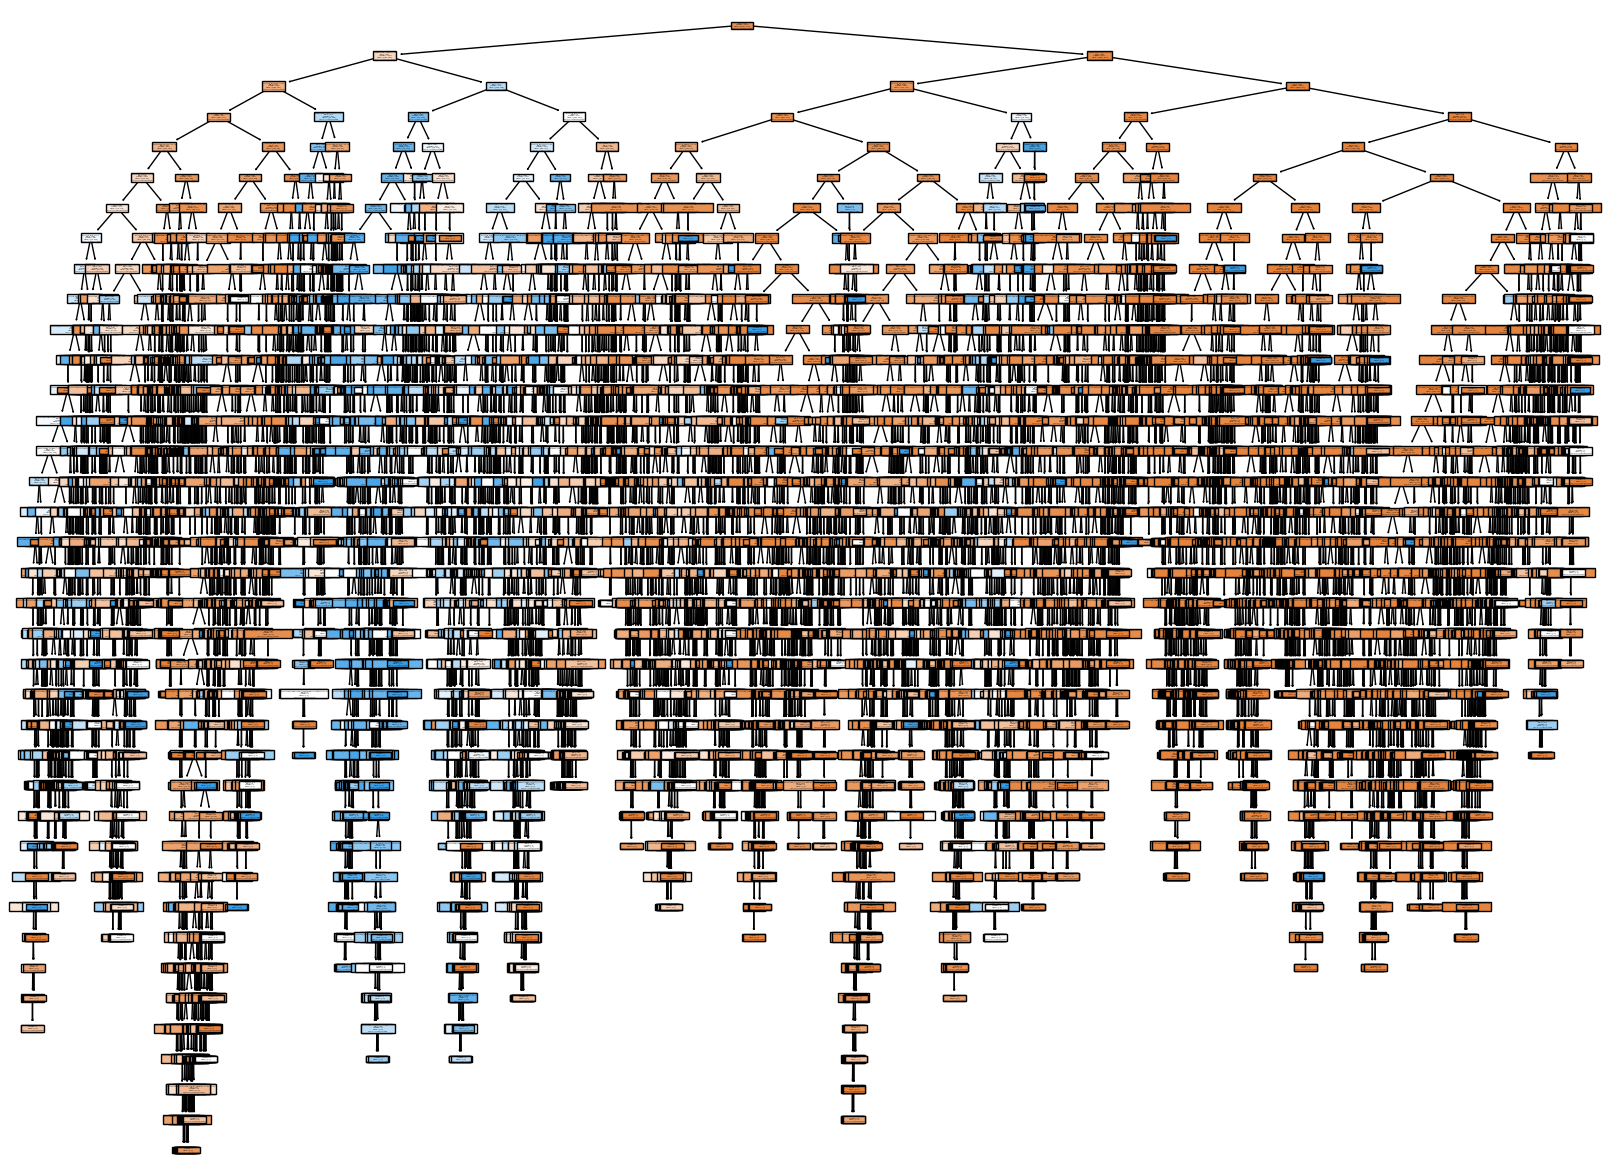

In [744]:
plt.figure(figsize=(20, 15))
plot_tree(model, filled=True, feature_names=X_for_tree.columns.tolist(), class_names=['No Accidental/Violenta', 'Accidental/Violenta'])
plt.savefig('arbol_decision.png', dpi=1000)
plt.show()

### 📍Random Forest

X = 'sexod', 'estadoconyugald', 'escolaridadd', 'trabajaactualmented', 'afiliaciond'
y = 'muerteaccidentalviolentad'

In [745]:
columnas_codificadas = X_encoded_df.columns.tolist()

print("Columnas codificadas en orden:")
for columna in columnas_codificadas:
    print(columna)

Columnas codificadas en orden:
sexod_HOMBRE
sexod_MUJER
sexod_NO ESPECIFICADO
sexod_SE IGNORA
estadoconyugald_CASADO(A)
estadoconyugald_DIVORCIADO(A)
estadoconyugald_NO APLICA
estadoconyugald_NO ESPECIFICADO
estadoconyugald_SE IGNORA
estadoconyugald_SEPARADO(A)
estadoconyugald_SOLTERO(A)
estadoconyugald_UNION LIBRE
estadoconyugald_VIUDO(A)
escolaridadd_BACHILLERATO O PREPARATORIA COMPLETA
escolaridadd_BACHILLERATO O PREPARATORIA INCOMPLETA
escolaridadd_LICENCIATURA O PROFESIONAL COMPLETO
escolaridadd_LICENCIATURA O PROFESIONAL INCOMPLETO
escolaridadd_NINGUNA
escolaridadd_NO APLICA
escolaridadd_NO ESPECIFICADO
escolaridadd_POSGRADO COMPLETO
escolaridadd_POSGRADO INCOMPLETO
escolaridadd_PREESCOLAR COMPLETA
escolaridadd_PREESCOLAR INCOMPLETA
escolaridadd_PRIMARIA COMPLETA
escolaridadd_PRIMARIA INCOMPLETA
escolaridadd_SE IGNORA
escolaridadd_SECUNDARIA COMPLETA
escolaridadd_SECUNDARIA INCOMPLETA
trabajaactualmented_NO
trabajaactualmented_NO APLICA
trabajaactualmented_NO ESPECIFICADO
trabaja

In [746]:
def imprimir_caracteristicas_persona(caracteristicas_persona):
    columnas = ['sexod_HOMBRE', 'sexod_MUJER', 'sexod_NO ESPECIFICADO', 'sexod_SE IGNORA',
                'estadoconyugald_CASADO(A)', 'estadoconyugald_DIVORCIADO(A)', 'estadoconyugald_NO APLICA',
                'estadoconyugald_NO ESPECIFICADO', 'estadoconyugald_SE IGNORA', 'estadoconyugald_SEPARADO(A)',
                'estadoconyugald_SOLTERO(A)', 'estadoconyugald_UNION LIBRE', 'estadoconyugald_VIUDO(A)',
                'escolaridadd_BACHILLERATO O PREPARATORIA COMPLETA',
                'escolaridadd_BACHILLERATO O PREPARATORIA INCOMPLETA',
                'escolaridadd_LICENCIATURA O PROFESIONAL COMPLETO',
                'escolaridadd_LICENCIATURA O PROFESIONAL INCOMPLETO', 'escolaridadd_NINGUNA',
                'escolaridadd_NO APLICA', 'escolaridadd_NO ESPECIFICADO', 'escolaridadd_POSGRADO COMPLETO',
                'escolaridadd_POSGRADO INCOMPLETO', 'escolaridadd_PREESCOLAR COMPLETA',
                'escolaridadd_PREESCOLAR INCOMPLETA', 'escolaridadd_PRIMARIA COMPLETA',
                'escolaridadd_PRIMARIA INCOMPLETA', 'escolaridadd_SE IGNORA', 'escolaridadd_SECUNDARIA COMPLETA',
                'escolaridadd_SECUNDARIA INCOMPLETA', 'trabajaactualmented_NO', 'trabajaactualmented_NO APLICA',
                'trabajaactualmented_NO ESPECIFICADO', 'trabajaactualmented_SE IGNORA', 'trabajaactualmented_SI',
                'afiliaciond_IMSS', 'afiliaciond_IMSS BIENESTAR', 'afiliaciond_ISSFAM', 'afiliaciond_ISSSTE',
                'afiliaciond_NINGUNA', 'afiliaciond_NO ESPECIFICADO', 'afiliaciond_OTRA', 'afiliaciond_PEMEX',
                'afiliaciond_SE IGNORA', 'afiliaciond_SEDENA', 'afiliaciond_SEGURO POPULAR / INSABI',
                'afiliaciond_SEMAR']

In [747]:
# Hombre casado, con educación de bachillerato completo, no afiliada a ningún seguro
persona_1 = np.array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.int16)
#La muerte de la persona fue accidental o violenta.

# Mujer divorciada, sin educación formal, otra afiliación
persona_2 = np.array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=np.int16)
#La muerte de la persona fue accidental o violenta.

# Hombre soltero, con educación universitaria completa, afiliado al ISSSTE
persona_3 = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=np.int16)

# Mujer viuda, con educación de secundaria incompleta, ISSFAM
persona_4 = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.int16)

# Hombre unión libre, sin educación formal, afiliado a OTRA
persona_5 = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=np.int16)


In [748]:
columnas = X_encoded_df.columns

caracteristicas_persona = persona_5

prediccion_persona = model.predict(caracteristicas_persona)

caracteristicas_activas = [columnas[i] for i, val in enumerate(caracteristicas_persona[0]) if val == 1]

print("Caracteristicas de la persona:")
for caracteristica in caracteristicas_activas:
    print(caracteristica)

if prediccion_persona == 0:
    print("La muerte de la persona no fue accidental o violenta.")
else:
    print("La muerte de la persona fue accidental o violenta.")

Caracteristicas de la persona:
sexod_HOMBRE
estadoconyugald_UNION LIBRE
afiliaciond_OTRA
La muerte de la persona fue accidental o violenta.


/Users/mariegarciaor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 🎯 Objetivo 4: Construir varios algoritmos de clasificación basados en Machine Learning, y mostrar cuál es el mejor con base en evidencia sólida. <a name="objetivo-5"></a>
<a href="#temario"><small>Volver al temario</small></a>

### 📍 Máquina de Soporte Vectorial

In [749]:
#Clasificación (variables categóricas)

In [755]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [756]:
SupportVectorMachine = SVC()
SupportVectorMachine.fit(x_train, y_train)

y_pred = SupportVectorMachine.predict(x_test)

AttributeError: 'csr_matrix' object has no attribute 'var'

✅ Evaluaremos que tan bueno es el clasificador:

In [ ]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)

(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

✅__Resultados con test_size=0.4__
[[32348     6]
 [ 3617    76]]
True positives: 76
True negatives: 32348
False positives: 6
False negative: 3617
Precision:89.94923294587622%
Sensibilidad:2.057947468183049%
Especificidad:99.98145515237682%

💡 Analizando los resultados, parece que el modelo hace un buen trabajo al predecir cuando un evento __no__ es una muerte accidental o violenta, con muy pocos errores al clasificar las muestras negativas (verdaderos negativos) y solo unos pocos casos incorrectos (falsos positivos). Sin embargo, parece que tiene dificultades para identificar correctamente las muertes accidentales o violentas reales, ya que clasifica erróneamente muchas de ellas como negativas (falsos negativos). Esto significa que el modelo suele pasar por alto la mayoría de las muertes accidentales o violentas reales.

✅ __Hicimos un ajuste a  test_size=0.2, resultado:__
[[16033    74]
 [ 1586   331]]
True positives: 331
True negatives: 16033
False positives: 74
False negative: 1586
Precision:90.79005770084332%
Sensibilidad:17.266562336984872%
Especificidad:99.54057242192835%

💡 Al ajustar el tamaño del conjunto de prueba al 20%, observamos una mejora en la sensibilidad del modelo, lo que significa que ahora es mejor detectando muertes accidentales o violentas reales.


✅ __Hicimos un último ajuste a  test_size=0.1, resultado:__
[[7955   60]
 [ 760  237]]
True positives: 237
True negatives: 7955
False positives: 60
False negative: 760
Precision:90.90102086107412%
Sensibilidad:23.771313941825476%
Especificidad:99.25140361821585%

💡 Redujimos el conjunto de prueba al 10% y con esto hubo una mejora en la sensibilidad del modelo, ahora el modelo es mucho mejor para detectar muertes accidentales o violentas reales. 

### 📍 Clasificador de Bayes

In [ ]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train) 
y_pred = NaiveBayes.predict(x_test) 

In [ ]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

💡 La precisión general del modelo, que es cuántos de los casos predichos como positivos son realmente positivos, es del 90%. Esto sugiere que el modelo es bastante preciso en general, pero tiene dificultades para identificar correctamente los casos positivos. Mientras tanto, de los casos negativos, el 99% fueron correctamente identificados (7942 de 8015).